In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import _pickle as pickle
from PIL import Image
import os

import requests
import cv2

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")

In [2]:
from bechdelai.image.img import Img
from bechdelai.image.face_detection import FacesDetector

# Retrieve all movies from bechdeltest.com

In [3]:
from bechdelai.data.bechdeltestcom import get_all_data

In [5]:
movies = get_all_data()

## Get TMDB ids from IMDB ids

In [6]:
from bechdelai.data.tmdb import get_id_from_imdb_id

In [8]:
tmdb_ids = []
for imdb_id in tqdm(movies["imdbid"].tolist()):
    tmdb_ids.append(get_id_from_imdb_id(imdb_id))

  0%|          | 0/9630 [00:00<?, ?it/s]

In [17]:
movies["tmdbid"] = tmdb_ids

Save dataset to avoid requesting again all ids

In [22]:
movies.to_excel("20221023_bechdeltestcom.xlsx")

##### Reload from excel file

In [4]:
movies = pd.read_excel("20221023_bechdeltestcom.xlsx")
movies.head()

,title,imdbid,id,rating,year,tmdbid
0,Passage de Venus,3155794.0,9602,0,1874,315946.0
1,La Rosace Magique,14495706.0,9804,0,1877,766094.0
2,Sallie Gardner at a Gallop,2221420.0,9603,0,1878,194079.0
3,Le singe musicien,12592084.0,9806,0,1878,751212.0
4,Athlete Swinging a Pick,7816420.0,9816,0,1881,502575.0


## Get all posters using TMDB API

In [5]:
from bechdelai.data.tmdb import get_poster_image

In [6]:
folder = r"D:\posters"
# folder = r"C:\git\bechdelai\data\posters_bechdeltestcom"

In [7]:
for movie in tqdm(movies["tmdbid"].tolist()):
    
    try:
        movie = int(movie)
        img = get_poster_image(movie,as_img = True)
        img = Img(img).resize(width = 600).img
        img.save(os.path.join(folder,f"{movie}.png"))
    except Exception as e:
        print(f"Skipped movie {movie} because of {e}")
        pass
    
#     break

  0%|          | 0/9630 [00:00<?, ?it/s]

Skipped movie nan because of cannot convert float NaN to integer
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie 335765 because of cannot identify image file <_io.BytesIO object at 0x000001E63B60D9A0>
Skipped movie 32406 because of cannot identify image file <_io.BytesIO object at 0x000001E63B62EC20>
Skipped movie 386743 because of cannot identify image file <_io.BytesIO object at 0x000001E63B62E040>
Skipped movie 33318 because of cannot identify image file <_io.BytesIO object at 0x000001E63B630400>
Skipped movie 355999 because of cannot identify image file <_io.BytesIO object at 0x000001E63B6309F0>
Skipped movie 355997 because of cannot identify image file <_io.BytesIO object at 0x000001E63B6301D0>
Skipped movie 355851 because of cannot identify image file <_io.BytesIO object at 0x000001E63B630400>
Skipped movie 355848 because of cannot identify image file <_io.BytesIO object at 0x000001E63B630A40>
Skipped movie 336380 because of cannot identify image fi

Skipped movie nan because of cannot convert float NaN to integer
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie 33429 because of cannot identify image file <_io.BytesIO object at 0x000001E63B639310>
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie 293878 because of cannot identify image file <_io.BytesIO object at 0x000001E63B631090>
Skipped movie 39366 because of cannot identify image file <_io.BytesIO object at 0x000001E63B638040>
Skipped movie 67892 because of cannot identify image file <_io.BytesIO object at 0x000001E63B6389A0>
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie nan because of cannot convert float NaN to integer
Skipped mo

Skipped movie nan because of cannot convert float NaN to integer
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie 374052 because of ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Skipped movie nan because of cannot convert float NaN to integer
Skipped movie 391913 because of ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Skipped movie 331313 because of ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Skipped movie 413736 because of ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Skipped

## Données TMDB

In [3]:
from bechdelai.data.tmdb import get_movie_details_from_imdb_id
from bechdelai.data.tmdb import get_id_from_imdb_id
from bechdelai.data.tmdb import get_movie_details_from_id

# Analyse d'un seul poster

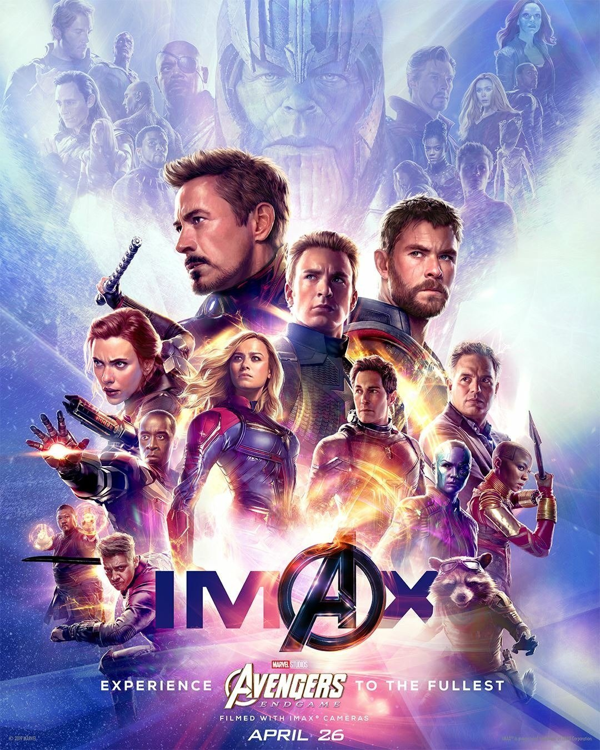

In [4]:
image = Img("./avengers-endgame-poster-imax.jpg")
image = image.resize(width = 600)
image

In [5]:
detector = FacesDetector()

In [6]:
faces,faces_data,rois,results = detector.predict(image.array,padding = 20)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


  0%|          | 0/21 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [7]:
results

,area,percentage,count,ratio_area,ratio_count
gender,,,,,
Man,157790,0.350644,17,7.295298,4.250000
Woman,21629,0.048064,4,0.137075,0.235294


In [8]:
faces_data

,gender,gender_proba_man,gender_proba_woman,index,proba,width,height,area,title,title_proba,percentage
0,Man,1.000000,3.850326e-07,1,1.000000,135,107,14445,Man,Man (100.00%),0.032100
1,Man,0.999999,1.008256e-06,1,0.999999,153,116,17748,Man,Man (100.00%),0.039440
2,Man,0.679927,3.200727e-01,1,0.679927,106,89,9434,Man,Man (67.99%),0.020964
3,Man,0.999999,1.339363e-06,1,0.999999,120,100,12000,Man,Man (100.00%),0.026667
4,Man,0.999911,8.884746e-05,1,0.999911,91,75,6825,Man,Man (99.99%),0.015167
5,Man,0.993838,6.161924e-03,1,0.993838,100,82,8200,Man,Man (99.38%),0.018222
6,Man,0.905192,9.480755e-02,1,0.905192,88,75,6600,Man,Man (90.52%),0.014667
7,Man,0.992769,7.231206e-03,1,0.992769,76,71,5396,Man,Man (99.28%),0.011991
8,Man,0.822241,1.777587e-01,1,0.822241,76,68,5168,Man,Man (82.22%),0.011484
9,Woman,0.002231,9.977690e-01,0,0.997769,87,79,6873,Woman,Woman (99.78%),0.015273


## Afficher les visages

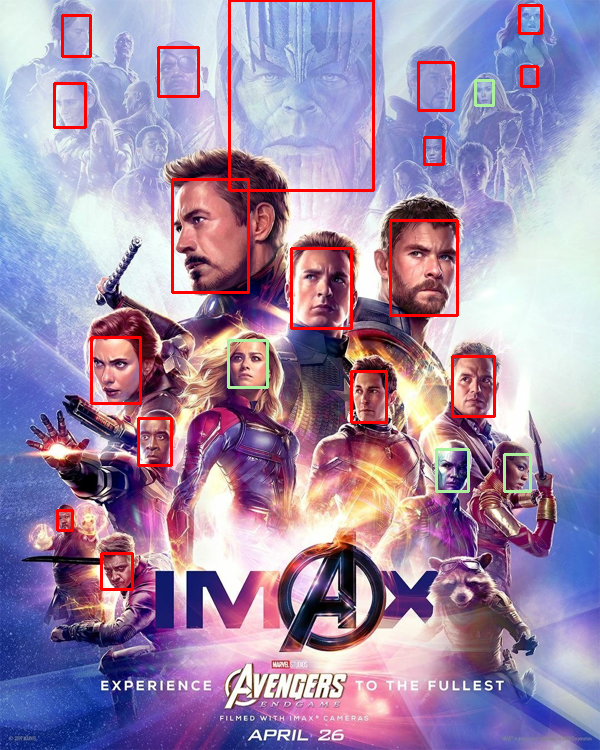

In [9]:
detector.show_faces_on_image(image.array,rois,faces_data = faces_data)

## Visualiser tous les visages

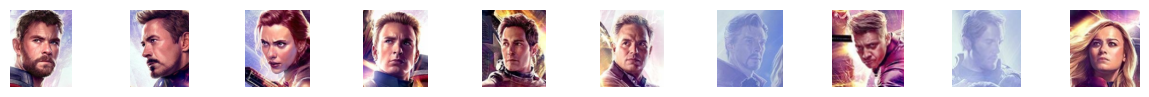

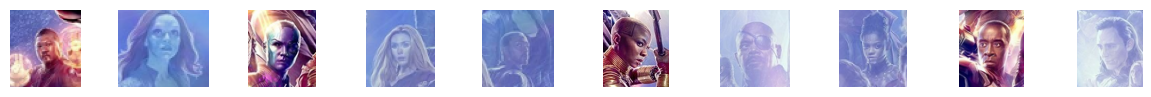

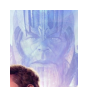

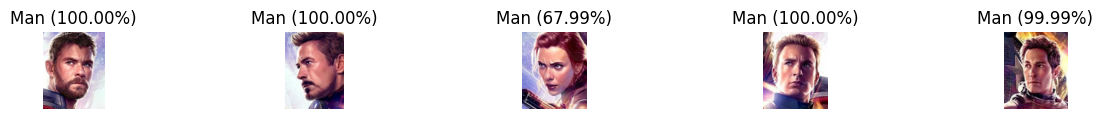

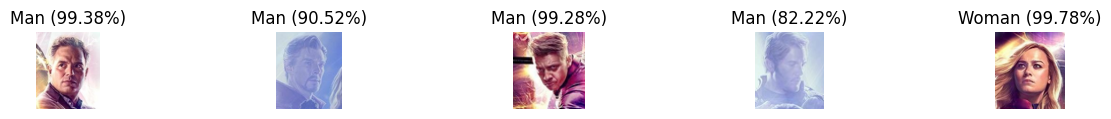

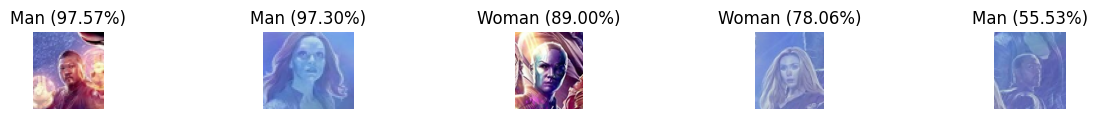

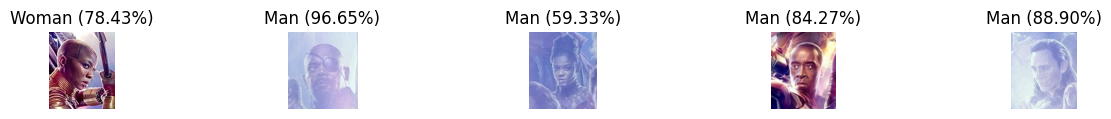

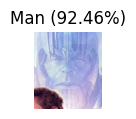

In [11]:
detector.show_all_faces(faces)
detector.show_all_faces(faces,titles = faces_data["title_proba"].tolist(),columns = 5)